In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.models import load_model
from lstm_bitcoin import read_data, select_dates, prep_data
from sklearn.metrics import mean_squared_error
from pandas.plotting import andrews_curves

Using TensorFlow backend.


In [2]:
def load_keras_model():
    model = load_model("lstm_model.h5")
    return model


def make_prediction(X_test, model):
    y_hat = model.predict(X_test[0:41700], batch_size=100)
    y_hat = np.reshape(y_hat, (y_hat.size,))
    return y_hat


def calc_rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))


def test_batch(X_test, y_test, batch_size):
    """
    makes test set divisible by batch size for stateful LSTM
    """
    max_val = (X_test.shape[0] // batch_size) * batch_size
    return X_test[0:max_val], y_test[0:max_val]

In [ ]:
LAGS=10
df = read_data()
df_train = select_dates(df, start="2017-01-01", end="2017-05-31")
df_test = select_dates(df, start="2017-06-01", end="2017-06-30")
X_train, X_test, y_train, y_test = prep_data(df_train, df_test, lags=LAGS)
X_test, y_test = test_batch(X_test, y_test, 100)

In [8]:
df_train.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Time,,,,,,,
2017-01-01 00:01:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-01 00:02:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-01 00:03:00,973.36,973.36,973.36,973.36,0.040000,38.934400,973.360000
2017-01-01 00:04:00,973.36,973.40,973.36,973.39,5.458800,5313.529708,973.387871
2017-01-01 00:05:00,973.35,973.39,973.35,973.38,12.481567,12149.200173,973.371395


In [9]:
X_test.shape

(41700, 10, 1)

In [ ]:
model = load_keras_model()
y_hat = make_prediction(X_test, model)
y_hat_series = pd.Series(y_hat, index=y_test.index, name="y_hat")

RMSE = 0.07907462321529148


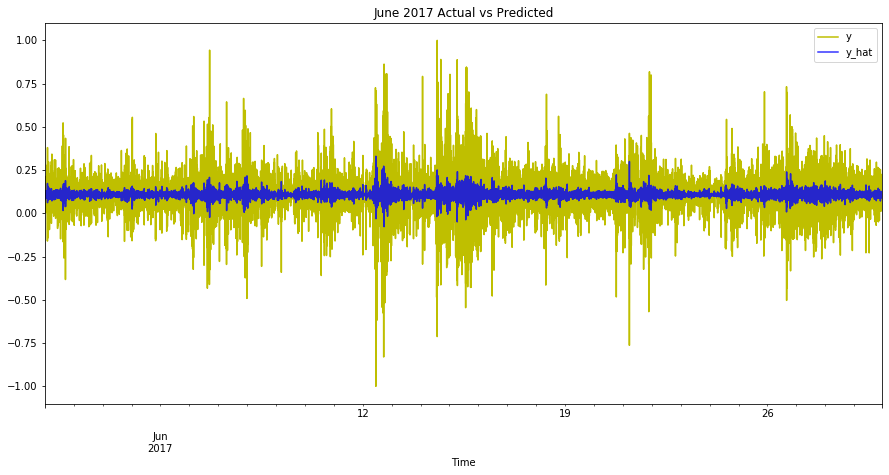

In [38]:
plt.figure(figsize=(15,7))
plt.title("June 2017 Actual vs Predicted")
y_test.plot(color=['y'])
#pd.Series(y_test.shift(-1), name="y_shifted").plot(alpha=0.7,color=['k'])
y_hat_series.plot(alpha=0.8, color=['b'])
plt.legend()
plt.savefig("prediction_shift.png", bbox_inches='tight')

print("RMSE = " + str(calc_rmse(y_test, y_hat)))